# The big screen theory

##### Miri and Michael
Last edited: 01.08.2017


## Overview and Motivation
Provide an overview of the project goals and the motivation for it. Consider that this will be read by people who did not see your project proposal.

## Related Work
Anything that inspired you, such as a paper, a web site, or something we discussed in class.

## Initial Questions

Our main target was to Predict a movie's IMDB score.

For this we had to answer:

- Can we predict a movie score based on our knowledge of the movie cast, budget, facebook popularity etc...?
- Which features are more significant than others?




    What questions are you trying to answer? How did these questions evolve over the course of the project? 
    What new questions did you consider in the course of your analysis? - Data: Source, scraping method, cleanup, storage, etc.

## Getting started with our data

In [1]:
import pandas as pd
df = pd.read_csv('movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,United Kingdom,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000


As seen above, our data initially consisted of 5000 rows, and 28 columns representing the differnt features.

___

## data preparation


We first had to perform data **cleanup** and fill in **missing values**, according to pre-defined rules such as:

| Missing value |Replace with...  |
|------|------|
| Color |blanks to "color"  |
|num_critics|0|
|   Names  | None|
|Duration| Median duration |
|Likes | 0|
|Gross\Budget | 0 |

We also **removed** samples for the following reasons:
   1. Samples of TV shows and not movies (based on content rating column).
   2. Unknown title year


In [2]:
from cleandata import clean
df = clean(df)

___

## Feature engineering

### Currency exchange and inflation compensation

Since we are dealing with movies from different countries, we found that currency columns are given in local currency, and had to be convered to USD for consistency.
In addition, a budget from 1920 cannot be compared to a 2015 budget, hence we had to compensate for the inflation over the years.
To do so, we used 2 external data sets:
   1. **An international currency exchange rate** - A data set that helped us convert the currency of each country to USD.
   2. **USD inflation values** - This data set helped us XXX to the 2016 currency. 


In [3]:
from currencyConvert import fixcurrency
df = fixcurrency(df)

### Cast gender analysis 

We wondered if the gender of the director or actors will also have an influence on our scores, so we used a **names data set**, and added a gender column for each name column.

>#### TODO:
>- We then added an "all male\female cast" columns to our data, for future use.
>- Do Something with this information in thw EDA part

*Note: 
We started this by using an existing API from the web, but once we finished implementing it on our data and tried to use it on the complete data set, we reached the "free limit" of the site and were blocked. This was quite frustrating, but it later made as develop the feature on our own. *


> ##TODO :  add names_DB_analysis to main, give an example of the results.

### Movie genre analysis

Originally, the genre column consisted of multiple genre types which made this column hard to analuse.
for example:

In [4]:
df[['movie_title', 'genres']].head(10)

,movie_title,genres
0,Avatar,Action|Adventure|Fantasy|Sci-Fi
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy
2,Spectre,Action|Adventure|Thriller
3,The Dark Knight Rises,Action|Thriller
4,John Carter,Action|Adventure|Sci-Fi
5,Spider-Man 3,Action|Adventure|Romance
6,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...
7,Avengers: Age of Ultron,Action|Adventure|Sci-Fi
8,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery
9,Batman v Superman: Dawn of Justice,Action|Adventure|Sci-Fi


Using a simple histogram of all genres, we identfied the top 5 genres and created added binary fields for this genres, for future analysis.

>##### TODO:
>- Do something with this information in the EDA part.

In [5]:
df[['movie_title', 'genres'] + list(df.columns)[-5:]].head(10)

,movie_title,genres,isDrama,isComedy,isThriller,isAction,isRomance
0,Avatar,Action|Adventure|Fantasy|Sci-Fi,False,False,False,True,False
1,Pirates of the Caribbean: At World's End,Action|Adventure|Fantasy,False,False,False,True,False
2,Spectre,Action|Adventure|Thriller,False,False,True,True,False
3,The Dark Knight Rises,Action|Thriller,False,False,True,True,False
4,John Carter,Action|Adventure|Sci-Fi,False,False,False,True,False
5,Spider-Man 3,Action|Adventure|Romance,False,False,False,True,True
6,Tangled,Adventure|Animation|Comedy|Family|Fantasy|Musi...,False,True,False,False,True
7,Avengers: Age of Ultron,Action|Adventure|Sci-Fi,False,False,False,True,False
8,Harry Potter and the Half-Blood Prince,Adventure|Family|Fantasy|Mystery,False,False,False,False,False
9,Batman v Superman: Dawn of Justice,Action|Adventure|Sci-Fi,False,False,False,True,False


>### Is blockbuster?
>#3 categories - 1. High profit movie - we will decide this according to the gross column
>#2. High ratio of budget/gross - would indicate 2 categories - low budget movies that earned a
>#lot more than they cost, and just good ROI movies

C:\Users\mirio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


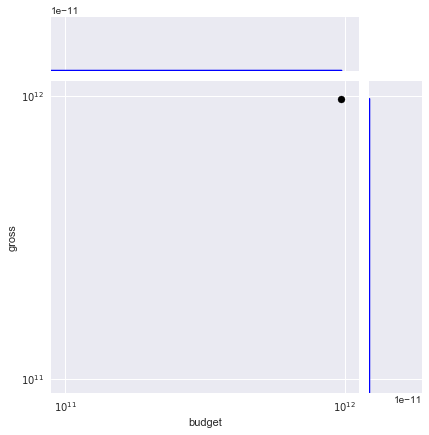

In [6]:
## TODO: fix this part

# First let's the histogram of budgets, and gross
#print(df['gross'])
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

g = sns.JointGrid('budget', 'gross', df)
g.plot_marginals(sns.distplot, hist=True, kde=True, color='blue')
g.plot_joint(plt.scatter, color='black', edgecolor='black')
ax = g.ax_joint
ax.set_xscale('log')
ax.set_yscale('log')
g.ax_marg_x.set_xscale('log')
g.ax_marg_y.set_yscale('log')
plt.show()
plt.figure()

---

## Exploratory Data Analysis
What visualizations did you use to look at your data in different ways? What are the different statistical methods you considered? Justify the decisions you made, and show any major changes to your ideas. How did you reach these conclusions?

Let's get started with some intersting visualiztions.


C:\Users\mirio\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


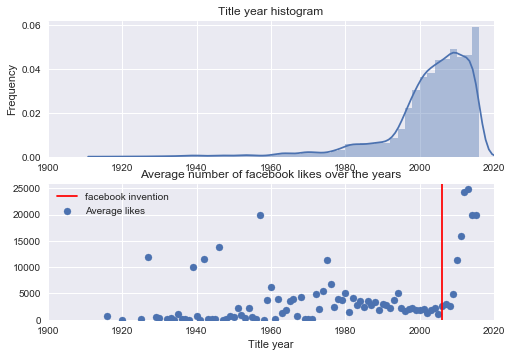

In [7]:
import basic_correlations as eda
eda.facebook_likes_over_the_years(df)

According to the simple year histogram we can note that we mainly deal with new films.
From movie facebook likes as a correlation to the year we see that obviously since the facebook was first public, the
number of likes per movie increased until it reached a certain stability.
There are some exceptions of old movies with high likes, usually "classics".

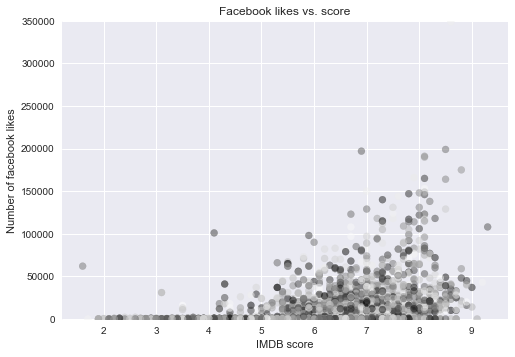

In [8]:
eda.facebook_likes_to_score(df)

we can see that the the really low score movies (below 5) really don't receive many likes, but other than that, there
seems to be no clear correlation between a high score and the number of likes.

C:\Users\mirio\PycharmProjects\IMDB\IMDB_project\basic_correlations.py:47: RuntimeWarning: invalid value encountered in true_divide
  ratio = np.divide(df['gross'], df['budget'])
C:\Users\mirio\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:3179: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


0       1.0
1       NaN
2       1.0
3       1.0
4       1.0
5       NaN
6       1.0
7       1.0
8       1.0
9       1.0
10      NaN
11      NaN
12      1.0
13      1.0
14      1.0
15      NaN
16      1.0
17      1.0
18      1.0
19      1.0
20      1.0
21      1.0
22      1.0
23      NaN
24      NaN
25      1.0
26      1.0
27      1.0
28      1.0
29      1.0
       ... 
5004    1.0
5005    1.0
5006    NaN
5007    1.0
5008    1.0
5009    1.0
5010    1.0
5011    NaN
5012    1.0
5013    1.0
5014    1.0
5015    1.0
5016    1.0
5017    NaN
5018    NaN
5019    1.0
5020    NaN
5021    1.0
5022    1.0
5023    1.0
5024    1.0
5025    1.0
5026    1.0
5027    NaN
5028    1.0
5029    1.0
5030    1.0
5032    1.0
5033    1.0
5034    1.0
Name: gross, dtype: float64


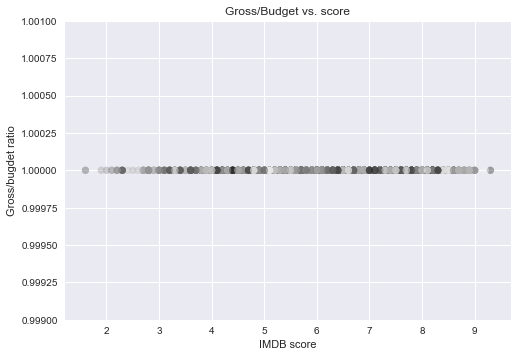

In [9]:
eda.budget_to_score(df)

## Final Analysis: 
    What did you learn about the data? How did you answer the questions? How can you justify your answers?
Presentation: Present your final results in a compelling and engaging way using text, visualizations, images, and videos on your project web site.
